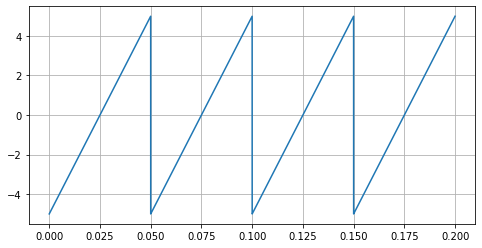

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.fftpack
import math
import scipy.signal

f = 20.0      # frequency, Hz
A = 5.0       # half-amplitude, without unit; total amplitude will be from -A to +A
T = 1.0 / f   # period, s
periods = 4   # how many periods to show

samples = 10240                    # Number of samplepoints
spacing = T * periods / samples   # sample spacing; must be smaller than 1/(2 * max_freq)

t = np.linspace(0.0, samples * spacing, samples, endpoint=False)   # Return evenly spaced numbers over a specified interval.

square = A * scipy.signal.sawtooth(2 * np.pi * t * f)

fig1, signal = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
signal.plot(t, square)
signal.grid()

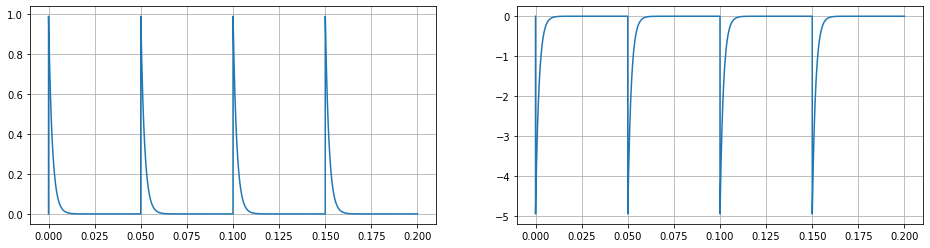

In [9]:
micro = 1 / 1000000.0
kilo = 1000.0

R = 2.0 * kilo
C = 1.0 * micro
tau = R*C

#print(T/resolution)

#discharge = np.exp(-(np.mod(t-(T/resolution), T/2)) / tau) #* np.sign(sin)
discharge = np.exp(-(np.mod(t-0.00000001, T)) / tau) #* np.sign(sin)

fig2, (disch, result) = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))
disch.plot(t, discharge)
result.plot(t, square * discharge)
disch.grid()
result.grid()

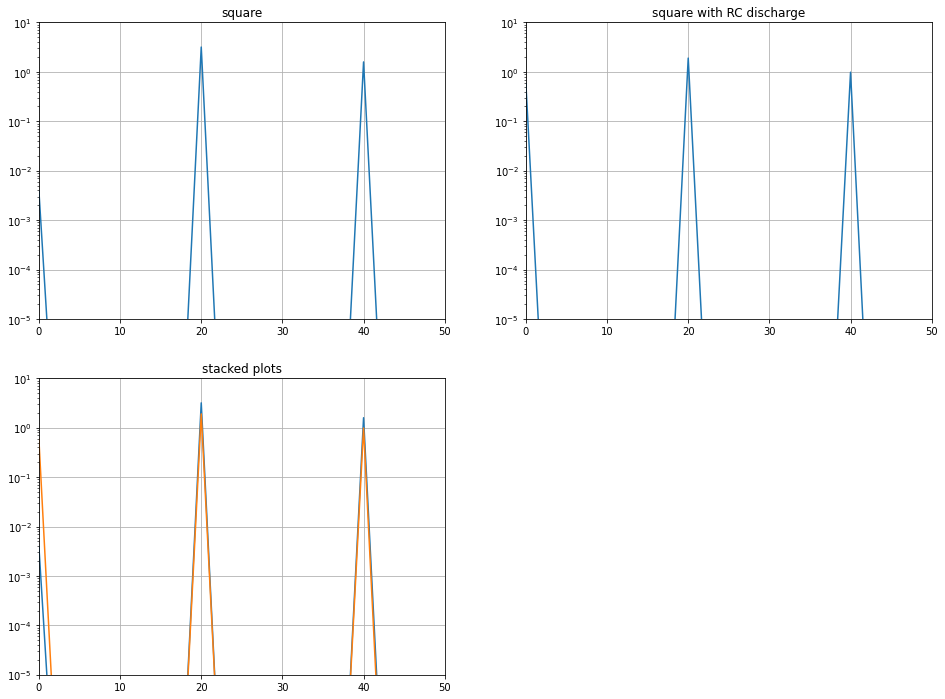

In [7]:
def plot_fft(x, f, axes, title=''):
    y = scipy.fft.fft(f)
    samples = len(y)
    axes.semilogy(x, 2.0/samples * np.abs(y[0:samples//2]))
    # axes.plot(x, 2.0/samples * np.abs(y[0:samples//2]))
    axes.set_xlim(left=0, right=50)
    axes.set_ylim(10e-6, 10)
    axes.set_title(title)
    axes.grid(True)
    
fig3, ((fft11, fft12), (fft21, fft22)) = plt.subplots(nrows=2, ncols=2, figsize=(16, 12)) #, sharex=True, sharey=True)
fig3.delaxes(fft22)

xf = scipy.fft.fftfreq(samples, spacing)[:samples//2]

plot_fft(xf, square, fft11, 'square')
plot_fft(xf, square * discharge, fft12, 'square with RC discharge')
plot_fft(xf, square, fft21, 'stacked plots')
plot_fft(xf, square * discharge, fft21, 'stacked plots')
# print()